In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("/Users/lszlpotyondi/PythonProjects/NASA_SpaceApps_challenge_2025/data/weather_2000_01_01.csv")

/var/folders/85/x93q_q394zg0v1yl1jdhl5rh0000gn/T/ipykernel_6901/3281612936.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/lszlpotyondi/PythonProjects/NASA_SpaceApps_challenge_2025/data/weather_2000_01_01.csv")


In [15]:
print(df.columns)

Index(['location', 'Basel', 'Basel.1', 'Basel.2', 'Basel.3', 'Basel.4',
       'Basel.5', 'Basel.6', 'Basel.7', 'Basel.8', 'Basel.9', 'Basel.10',
       'Basel.11', 'Basel.12', 'Basel.13', 'Basel.14', 'Basel.15', 'Basel.16',
       'Basel.17', 'Basel.18', 'Basel.19', 'Basel.20', 'Basel.21', 'Basel.22',
       'Basel.23', 'Basel.24', 'Basel.25', 'Basel.26', 'Basel.27', 'Basel.28',
       'Basel.29', 'Basel.30', 'Basel.31', 'Basel.32', 'Basel.33', 'Basel.34',
       'Basel.35'],
      dtype='object')


In [14]:
df.head(20)

,location,Basel,Basel.1,Basel.2,Basel.3,Basel.4,Basel.5,Basel.6,Basel.7,Basel.8,...,Basel.26,Basel.27,Basel.28,Basel.29,Basel.30,Basel.31,Basel.32,Basel.33,Basel.34,Basel.35
0,lat,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,...,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000
1,lon,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,...,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000
2,asl,363.653,363.653,363.653,363.653,363.653,363.653,363.653,363.653,363.653,...,363.653,363.653,363.653,363.653,363.653,363.653,363.653,363.653,363.653,363.653
3,variable,Temperature,Growing Degree Days,Temperature,Temperature,Precipitation Total,Relative Humidity,Snowfall Amount,Wind Gust,Wind Speed,...,Diffuse Shortwave Radiation,Mean Sea Level Pressure,Geopotential Height,Geopotential Height,Geopotential Height,Geopotential Height,Evapotranspiration,FAO Reference Evapotranspiration,Vapor Pressure Deficit,Temperature
4,unit,°C,GDDc,°C,°C,mm,%,cm,km/h,km/h,...,W/m²,hPa,Gpm,Gpm,Gpm,Gpm,mm,mm,hPa,°C
5,level,2 m elevation corrected,2 m elevation corrected,850 mb,700 mb,sfc,2 m,sfc,sfc,10 m,...,sfc,MSL,1000 mb,850 mb,700 mb,500 mb,sfc,2 m,2 m,sfc
6,resolution,hourly,hourly,hourly,hourly,hourly,hourly,hourly,hourly,hourly,...,hourly,hourly,hourly,hourly,hourly,hourly,hourly,hourly,hourly,hourly
7,aggregation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,timestamp,Basel Temperature [2 m elevation corrected],Basel Growing Degree Days [2 m elevation corre...,Basel Temperature [850 mb],Basel Temperature [700 mb],Basel Precipitation Total,Basel Relative Humidity [2 m],Basel Snowfall Amount,Basel Wind Gust,Basel Wind Speed [10 m],...,Basel Diffuse Shortwave Radiation,Basel Mean Sea Level Pressure [MSL],Basel Geopotential Height [1000 mb],Basel Geopotential Height [850 mb],Basel Geopotential Height [700 mb],Basel Geopotential Height [500 mb],Basel Evapotranspiration,Basel FAO Reference Evapotranspiration [2 m],Basel Vapor Pressure Deficit [2 m],Basel Temperature
9,20000101T0000,1.5002453,0.0,-2.63,-8.95,0.0,93.29928,0.0,10.799999,5.04,...,0.0,1025.8,207.0,1509.0,3028.0,5571.0,0.0,0.0,0.43862152,-1.85


In [17]:
df2 = pd.read_csv("/Users/lszlpotyondi/PythonProjects/NASA_SpaceApps_challenge_2025/data/ffg.csv")

/var/folders/85/x93q_q394zg0v1yl1jdhl5rh0000gn/T/ipykernel_6901/792100701.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/Users/lszlpotyondi/PythonProjects/NASA_SpaceApps_challenge_2025/data/ffg.csv")


In [ ]:
print(len(df2['engage_x']==''))
print(len(df2)-len(df2['engage_x'].isnull()))




216769
0


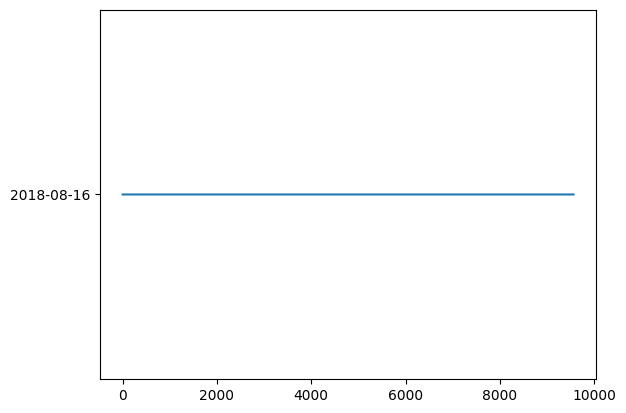

In [ ]:
plot = plt.plot(df[])




koi_seff=3700-6700
koi_sage = more than 0.2 b
imag = more than 0? //infra
gmag = more than 0? //photosynthesis
rmag = more than 0? //photosynthesis
koi_smet = about or more than the sun's





In [1]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, asin

def haversine(lat1, lon1, lat2, lon2):
    """
    Compute the great-circle distance (in kilometers) between two points 
    on the Earth given by latitude and longitude in degrees.
    """
    earth_radius = 6371.0  # in km
    lat1_rad = radians(lat1)
    lat2_rad = radians(lat2)
    delta_lat = radians(lat2 - lat1)
    delta_lon = radians(lon2 - lon1)
    a = sin(delta_lat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(delta_lon / 2)**2
    c = 2 * asin(sqrt(a))
    distance = earth_radius * c
    return distance

def filter_unique_within_radius(df, radius_km=15.0):
    """
    From a DataFrame with 'latitude' and 'longitude', return a subset such that
    no two selected points are within radius_km of each other.
    Uses a greedy approach: picks in order of descending brightness.
    """
    df2 = df.copy().reset_index(drop=True)
    df2 = df2.sort_values(by='brightness', ascending=False).reset_index(drop=True)

    selected = []
    used = np.zeros(len(df2), dtype=bool)

    for i, row in df2.iterrows():
        if used[i]:
            continue
        # Select this point
        selected.append((row.latitude, row.longitude))
        # Mark all other points within radius as used
        for j in range(i + 1, len(df2)):
            if used[j]:
                continue
            d = haversine(row.latitude, row.longitude,
                          df2.at[j, 'latitude'], df2.at[j, 'longitude'])
            if d <= radius_km:
                used[j] = True
        # Mark itself as used
        used[i] = True

    # Create DataFrame for selected points
    sel_df = pd.DataFrame(selected, columns=['latitude', 'longitude'])
    return sel_df

def main(input_csv, output_txt):
    df = pd.read_csv(input_csv)
    # Ensure latitude / longitude columns exist
    if 'latitude' not in df.columns or 'longitude' not in df.columns:
        raise ValueError("CSV input must have 'latitude' and 'longitude' columns")
    unique_df = filter_unique_within_radius(df, radius_km=15.0)
    # Write output lines “latitude,longitude”
    with open(output_txt, 'w') as f:
        for _, row in unique_df.iterrows():
            f.write(f"{row.latitude:.6f},{row.longitude:.6f}\n")

if __name__ == '__main__':
    # Example usage
    input_csv = '/Users/lszlpotyondi/PythonProjects/NASA_SpaceApps_challenge_2025/data/GREECE_2000_2021 - fire_archive_M-C61_214279.csv'
    output_txt = 'unique_locations.txt'
    main(input_csv, output_txt)
